In [262]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


<h2 style="background-color:lightgreen;color:Blue">Time evolution (sanity check)</h2>
When you have a time dependent hamiltonian, a stationary state no longer exists because one cannot write a time-independent Schrodinger equation by seperating variables anymore. So the way to find energy of the system would be to use the time evoultion operator and evolve the Hamiltonian to any time you want and manually diagonalize it. 
Although I do not understand why, it turns out in this situation, one can write an instantaneous eigenstate equation for the hamiltonian and simply find the eigenvalues of that by putting in the time you want. Below is a code that checks for that. Why does this happen? 

In [263]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
from scipy.linalg import expm

sigmax = np.array([[0, 1],[1, 0]])
sigmay = np.array([[0, -1j],[1j, 0]])
sigmaz = np.array([[1, 0j],[0, -1]])

def H(w1, phi1, m, t):
    return np.sin(w1*t + phi1)*sigmax + np.sin(w1*t + phi1)*sigmay + (m - 2*np.cos(w1*t + phi1))*sigmaz
    
def eigv1(w1, phi1, m, t):  # not required for now
    d1 = np.sin(w1*t + phi1)
    d2 = np.sin(w1*t + phi1)
    d3 = (m - 2*np.cos(w1*t + phi1))
    d = np.sqrt(d1**2 + d2**2 + d3**2)
    return (1/(np.sqrt(2*d*(d+d3))))*np.array([d1 - 1j * d2, d + d3])
    
def eigv2(w1, phi1, m, t):  # not required for now
    d1 = np.sin(w1*t + phi1)
    d2 = np.sin(w1*t + phi1)
    d3 = (m - 2*np.cos(w1*t + phi1))
    d = np.sqrt(d1**2 + d2**2 + d3**2)
    return (1/(np.sqrt(2*d*(d+d3))))*np.array([d1 - 1j * d2, d - d3])

In [264]:
def U(w1, phi1, m, t, dt):
    return expm(-1j* H(w1, phi1, m, t)*dt)

def evolve(w1, phi1, m, dt, T):
    tvals = np.arange(0, T+dt, dt)
    u = np.identity(2)
    for i in tvals:
        u = np.dot(u, U(w1, phi1, m, i, dt))
    return u

In [275]:
# evolve hamiltonian using evolution operator
band1 = []
band2 = []
tvals = np.arange(0,100,0.1)
w1 = np.pi/6
phi1 = 0
m = 1
dt = 0.1

for i in tvals:
    udag = np.transpose(np.conjugate( U(w1, phi1, m, i, dt) ))
    u = U(w1, phi1, m, i, dt)
    hu = np.dot(H(w1, phi1, m, i), u)
    udhu = np.transpose(np.conjugate(np.dot(udag, hu)))
    eigs = np.sort(la.eigvals(udhu))
    band1.append(eigs[0])
    band2.append(eigs[1])

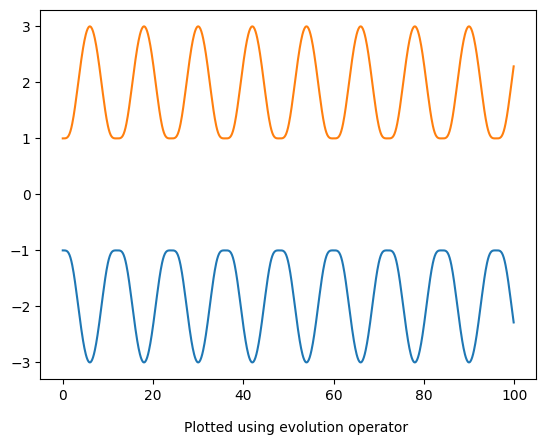

In [279]:
plt.plot(tvals, np.real(band1), label = 'band1')
plt.plot(tvals, np.real(band2), label = 'band2')
plt.figtext(0.35,0,'Plotted using evolution operator')
plt.show()

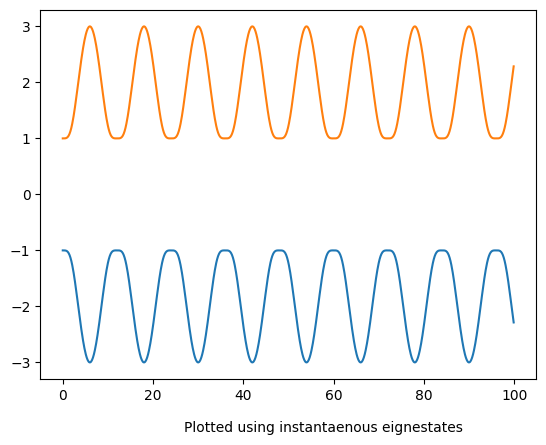

In [280]:
band1 = []
band2 = []
for i in tvals:
    a, b = np.sort(np.real(la.eigvals(H(w1, phi1, m, i))))
    band1.append(a)
    band2.append(b)
plt.plot(tvals, band1)
plt.figtext(0.35,0,'Plotted using instantaenous eignestates')
plt.plot(tvals, band2)
plt.show()

In [281]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  Y


RUN RESET BEFORE GOING TO THE NEXT SECTION PLEASE

<h2 style="background-color:lightgreen;color:blue"">Two-tone qubit <br>Energy dispersion, E vs t (fixed inital phases)</h2>

In [283]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
from scipy.linalg import expm

sigmax = np.array([[0, 1],[1, 0]])
sigmay = np.array([[0, -1j],[1j, 0]])
sigmaz = np.array([[1, 0j],[0, -1]])

def H(w1, phi1, w2, phi2, m, t):
    return (np.sin(w1*t + phi1)*sigmax + np.sin(w2*t + phi2)*sigmay + (m - np.cos(w1*t + phi1) - np.cos(w2*t + phi2))*sigmaz)  #- np.matrix([[(w1+w2)*t, 0], [0, -(w1+w2)*t]])
    
def eigv1(w1, phi1, w2, phi2, m, t):
    d1 = np.sin(w1*t + phi1)
    d2 = np.sin(w1*t + phi1)
    d3 = (m - np.cos(w1*t + phi1) - np.cos(w2*t + phi2))
    d = np.sqrt(d1**2 + d2**2 + d3**2)
    return (1/(np.sqrt(2*d*(d+d3))))*np.array([d1 - 1j * d2, d + d3])

In [290]:
w1 = 0.1
g = (1+np.sqrt(5))/2
w2 = g*w1
tvals = np.arange(0,50,0.01)
m = 1
phi1 = np.pi/10
phi2 = 0

In [291]:
band1 = []
band2 = []
for i in tvals:
    a, b = np.sort(np.real(la.eigvals(H(w1, phi1, w2, phi2, m, i*(2*np.pi)/w1))))
    band1.append(a/w2)
    band2.append(b/w2)

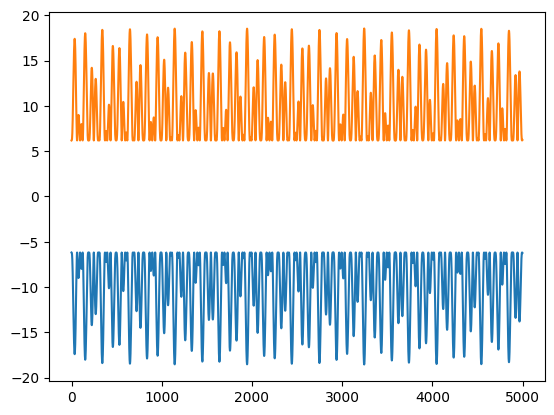

In [292]:
plt.plot(band1)
plt.plot(band2)

In [293]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


<h2 style="background-color:lightgreen;color:blue"">Two-tone qubit <br>Energy dispersion, E vs \phi (fixed time)</h2>